# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [3]:
bcancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [4]:
bcancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
bcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
bcancer.shape

(699, 11)

In [15]:
bcancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
bcancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [16]:
count_question = bcancer['Bare Nuclei'].value_counts()['?']
print(count_question)

16


In [17]:
#Checking datatye of Bare Nuclei
bcancer['Bare Nuclei'].dtype

dtype('O')

In [20]:
# Finding top value
top_value = bcancer['Bare Nuclei'].describe(include='all').top

In [21]:
top_value

'1'

In [22]:
#Replacing ? with top value i.e. 1
bcancer['Bare Nuclei'].replace("?",value=1,inplace=True)

In [26]:
bcancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

## Now there is no '?' in the dataset

In [27]:
#Changing datatype of Bare Nuclei to integar
bcancer['Bare Nuclei']=bcancer['Bare Nuclei'].astype(int)

In [31]:
# dropping duplicate values 
bcancer.drop_duplicates(keep=False,inplace=True) 

In [32]:
bcancer.shape

(681, 11)

In [33]:
# duplicates values has been dropped

In [34]:
# Id columns is to identify rows hence can be skipped in analysis
# Before performing analysis let us drop ID column

In [35]:
bcan=bcancer.drop('ID', axis=1)

In [37]:
bcan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 681 non-null int64
Cell Size                      681 non-null int64
Cell Shape                     681 non-null int64
Marginal Adhesion              681 non-null int64
Single Epithelial Cell Size    681 non-null int64
Bare Nuclei                    681 non-null int32
Normal Nucleoli                681 non-null int64
Bland Chromatin                681 non-null int64
Mitoses                        681 non-null int64
Class                          681 non-null int64
dtypes: int32(1), int64(9)
memory usage: 55.9 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

In [39]:
bcan.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641402,0.652590,0.489078,0.512561,0.591328,0.563768,0.535161,0.350354,0.717653
Cell Size,0.641402,1.000000,0.903755,0.720542,0.741953,0.682397,0.763674,0.731454,0.461207,0.817266
Cell Shape,0.652590,0.903755,1.000000,0.698781,0.708565,0.700736,0.741308,0.729812,0.442043,0.816135
Marginal Adhesion,0.489078,0.720542,0.698781,1.000000,0.617348,0.678242,0.673094,0.601059,0.416363,0.705671
Single Epithelial Cell Size,0.512561,0.741953,0.708565,0.617348,1.000000,0.577150,0.625147,0.639145,0.486105,0.679304
Bare Nuclei,0.591328,0.682397,0.700736,0.678242,0.577150,1.000000,0.671267,0.581668,0.343282,0.814279
Normal Nucleoli,0.563768,0.763674,0.741308,0.673094,0.625147,0.671267,1.000000,0.672396,0.343374,0.756864
Bland Chromatin,0.535161,0.731454,0.729812,0.601059,0.639145,0.581668,0.672396,1.000000,0.426625,0.718572
Mitoses,0.350354,0.461207,0.442043,0.416363,0.486105,0.343282,0.343374,0.426625,1.000000,0.424750
Class,0.717653,0.817266,0.816135,0.705671,0.679304,0.814279,0.756864,0.718572,0.424750,1.000000


In [55]:
bcan.corr()['Class']

ClumpThickness                 0.717653
Cell Size                      0.817266
Cell Shape                     0.816135
Marginal Adhesion              0.705671
Single Epithelial Cell Size    0.679304
Bare Nuclei                    0.814279
Normal Nucleoli                0.756864
Bland Chromatin                0.718572
Mitoses                        0.424750
Class                          1.000000
Name: Class, dtype: float64

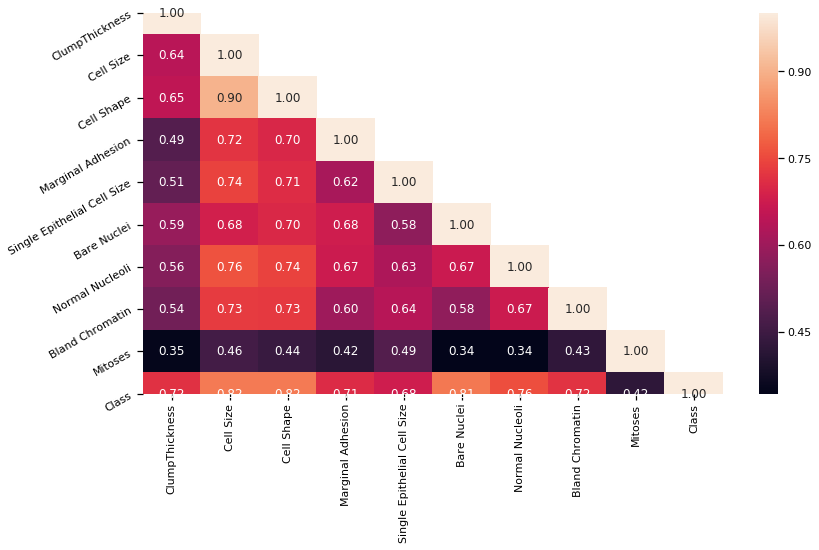

In [53]:
#Graphical representation of correlations between features
corr = bcan.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

C:\Users\yogeshk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\yogeshk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


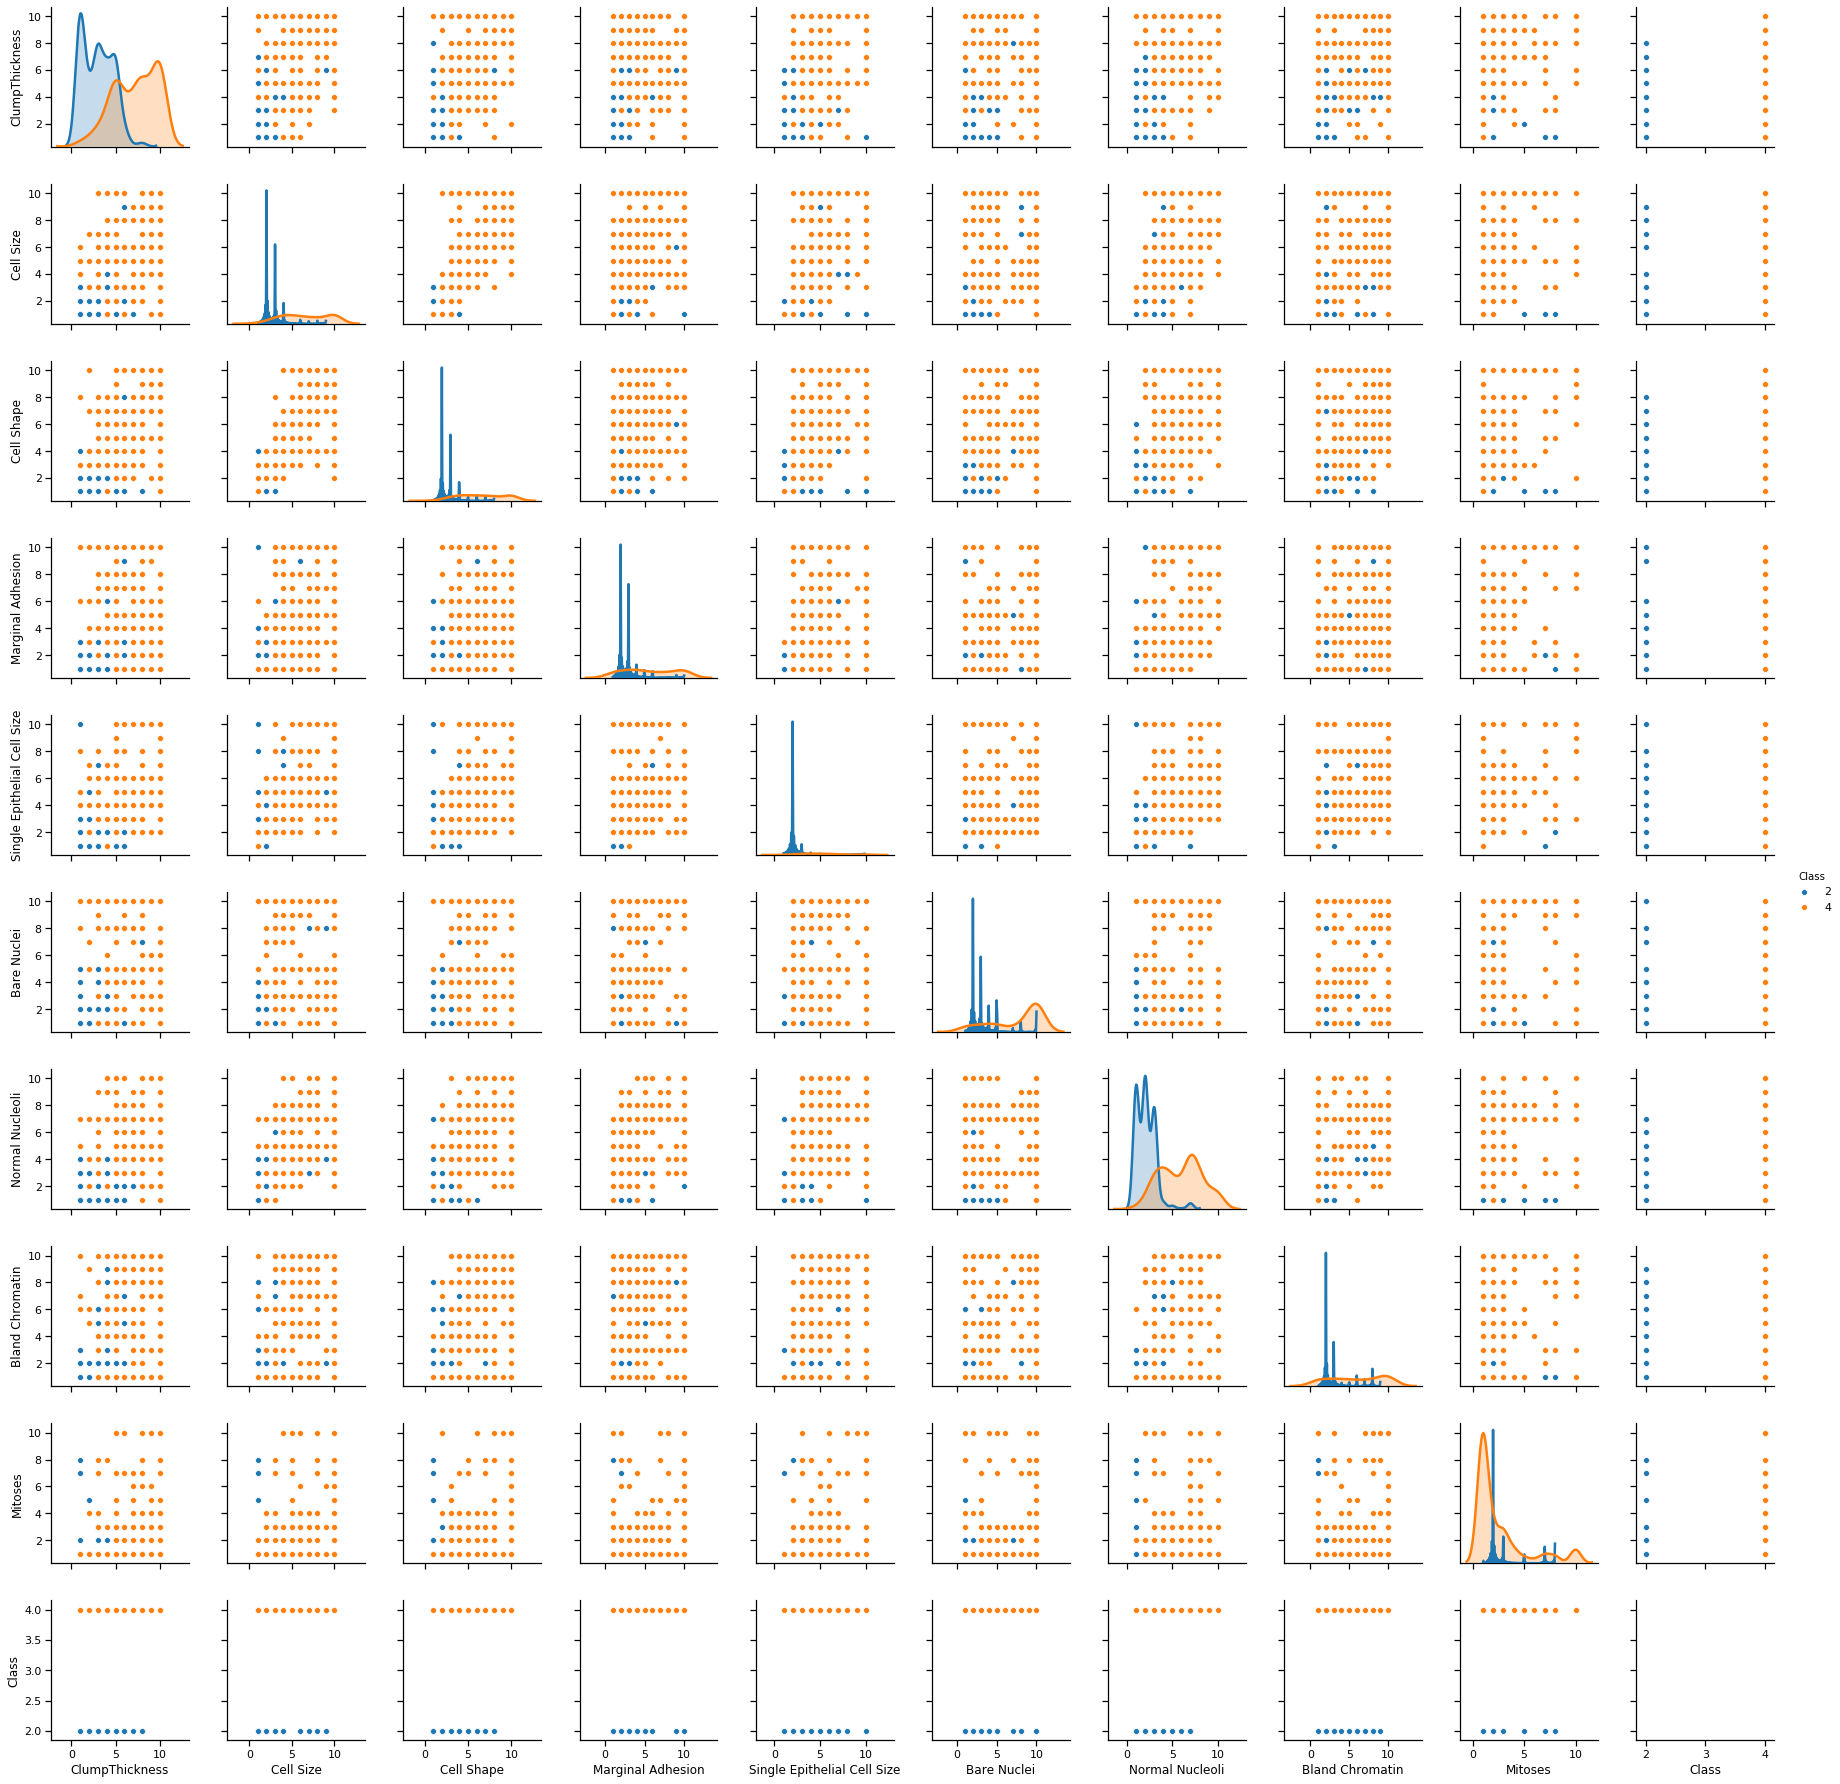

In [49]:
sns.pairplot(bcan, hue = "Class")

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

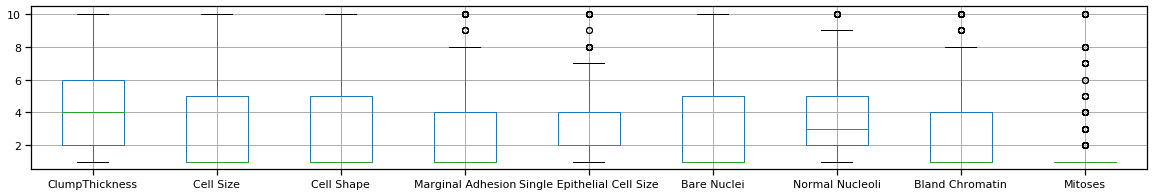

In [70]:
#df = pd.DataFrame(data = np.random.random(size=(30,9)), columns = ['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'])
bcan.boxplot(figsize=(20,3), column = ['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'])


In [71]:
pd.crosstab(bcan['Marginal Adhesion'], bcan['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [73]:
bcan['Marginal Adhesion']=np.where(bcan['Marginal Adhesion']>4,4,bcan['Marginal Adhesion'])

In [75]:
bcan['Single Epithelial Cell Size']=np.where(bcan['Single Epithelial Cell Size']>4,4,bcan['Single Epithelial Cell Size'])

In [79]:
bcan['Normal Nucleoli']=np.where(bcan['Normal Nucleoli']>5,5,bcan['Normal Nucleoli'])

In [81]:
bcan['Bland Chromatin']=np.where(bcan['Bland Chromatin']>4,4,bcan['Bland Chromatin'])

In [83]:
bcan['Mitoses']=np.where(bcan['Mitoses']>1,1,bcan['Mitoses'])

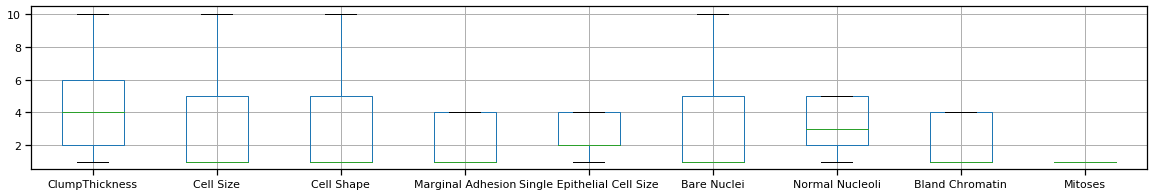

In [84]:
bcan.boxplot(figsize=(20,3), column = ['ClumpThickness','Cell Size','Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'])

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [ ]:
# As "Class" column is target therefore rRemoving "Class" column

In [85]:
bcan2=bcan.drop('Class', axis=1)

In [86]:
bcan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 681 non-null int64
Cell Size                      681 non-null int64
Cell Shape                     681 non-null int64
Marginal Adhesion              681 non-null int64
Single Epithelial Cell Size    681 non-null int64
Bare Nuclei                    681 non-null int32
Normal Nucleoli                681 non-null int64
Bland Chromatin                681 non-null int64
Mitoses                        681 non-null int64
dtypes: int32(1), int64(8)
memory usage: 70.5 KB


# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [89]:
cov_matrix=np.cov(bcan2.T)

In [90]:
cov_matrix

array([[ 7.9468256 ,  5.4843418 ,  5.42595232,  2.03604561,  1.57162477,
         6.02115833,  2.40623866,  2.10485229,  0.        ],
       [ 5.4843418 ,  9.20015548,  8.08513864,  2.87757839,  2.24884037,
         7.4763475 ,  3.22731278,  2.88807334,  0.        ],
       [ 5.42595232,  8.08513864,  8.69917509,  2.73026475,  2.12076747,
         7.46531917,  3.06925585,  2.78153451,  0.        ],
       [ 2.03604561,  2.87757839,  2.73026475,  1.69790533,  0.87476462,
         3.29685583,  1.25734862,  1.11606418,  0.        ],
       [ 1.57162477,  2.24884037,  2.12076747,  0.87476462,  0.92611212,
         2.36200872,  0.96295888,  0.91193098,  0.        ],
       [ 6.02115833,  7.4763475 ,  7.46531917,  3.29685583,  2.36200872,
        13.04697245,  3.66808327,  3.04369439,  0.        ],
       [ 2.40623866,  3.22731278,  3.06925585,  1.25734862,  0.96295888,
         3.66808327,  2.18029714,  1.33625507,  0.        ],
       [ 2.10485229,  2.88807334,  2.78153451,  1.11606418,  0

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [92]:
from numpy import linalg as LA

In [102]:
eigval,eigenvec=np.linalg.eig(cov_matrix)

In [103]:
print(eigval)

[34.12828018  4.39643843  3.57590288  0.27354863  1.02872336  0.81815472
  0.56252767  0.63591104  0.        ]


In [104]:
print(eigenvec)

[[-3.75528319e-01 -2.92108629e-01  8.77952000e-01 -4.51758396e-03
   3.42848488e-02 -4.03252016e-02  5.16458444e-03  1.63177496e-03
   0.00000000e+00]
 [-4.75535993e-01 -3.77612821e-01 -3.54296125e-01 -8.42618329e-02
  -1.30398969e-01 -6.69865443e-01 -9.63763247e-02 -1.53740942e-01
   0.00000000e+00]
 [-4.64791433e-01 -3.25184228e-01 -3.02168862e-01 -3.03602254e-04
   5.18657449e-01  5.57419229e-01  8.40428143e-02  1.15363794e-02
   0.00000000e+00]
 [-1.77666593e-01  2.59771000e-02 -6.43989690e-02 -1.43129622e-01
  -2.62737582e-01 -3.37821626e-02  6.37651587e-01  6.82901632e-01
   0.00000000e+00]
 [-1.33722835e-01 -2.14476199e-02 -5.14901064e-02  9.53912788e-01
  -1.74584421e-01  2.03921451e-02 -8.61118813e-02  1.75346943e-01
   0.00000000e+00]
 [-5.43775160e-01  8.14568516e-01  2.86678652e-02 -2.26471070e-02
   1.51684629e-01 -9.21925092e-02 -6.94896755e-02 -5.58163942e-02
   0.00000000e+00]
 [-2.01789013e-01  1.27388993e-02 -4.12008960e-02 -2.12270573e-02
  -6.32149324e-01  3.7078546

# Q8 Find variance and cumulative variance by each eigen vector

In [105]:
from sklearn.decomposition import PCA

In [107]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 75.14017109  84.81980142  92.69286015  94.95779847  96.7591282
  98.15921236  99.39772848 100.         100.        ]


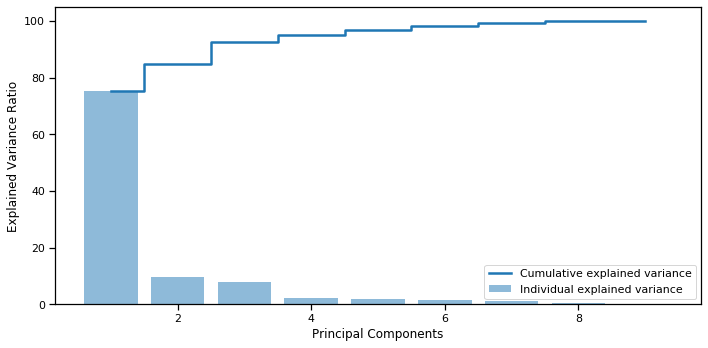

In [108]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [110]:
from sklearn.decomposition import PCA

In [126]:
pca= PCA(n_components=7)
pca.fit(bcan2)
bcan2_pca = pca.transform(bcan2)

In [127]:
bcan2_pca.shape

(681, 7)

In [128]:
print(pca.components_)

[[ 0.37552832  0.47553599  0.46479143  0.17766659  0.13372283  0.54377516
   0.20178901  0.1759417  -0.        ]
 [ 0.29210863  0.37761282  0.32518423 -0.0259771   0.02144762 -0.81456852
  -0.0127389   0.03895341  0.        ]
 [ 0.877952   -0.35429612 -0.30216886 -0.06439897 -0.05149011  0.02866787
  -0.0412009  -0.05523317  0.        ]
 [-0.03428485  0.13039897 -0.51865745  0.26273758  0.17458442 -0.15168463
   0.63214932  0.43667305 -0.        ]
 [ 0.0403252   0.66986544 -0.55741923  0.03378216 -0.02039215  0.09219251
  -0.37078546 -0.30232363  0.        ]
 [-0.00163177  0.15374094 -0.01153638 -0.68290163 -0.17534694  0.05581639
   0.57144249 -0.38660677  0.        ]
 [-0.00516458  0.09637632 -0.08404281 -0.63765159  0.08611188  0.06948968
  -0.30549905  0.68662104 -0.        ]]


In [133]:
df_comp=pd.DataFrame(pca.components_,columns=list(bcan2))

In [134]:
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.375528,0.475536,0.464791,0.177667,0.133723,0.543775,0.201789,0.175942,-0.0
1,0.292109,0.377613,0.325184,-0.025977,0.021448,-0.814569,-0.012739,0.038953,0.0
2,0.877952,-0.354296,-0.302169,-0.064399,-0.051490,0.028668,-0.041201,-0.055233,0.0
3,-0.034285,0.130399,-0.518657,0.262738,0.174584,-0.151685,0.632149,0.436673,-0.0
4,0.040325,0.669865,-0.557419,0.033782,-0.020392,0.092193,-0.370785,-0.302324,0.0


In [135]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

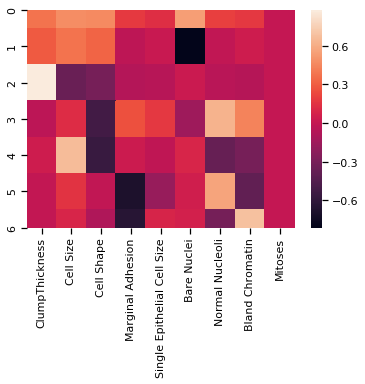

In [136]:
sns.heatmap(df_comp)

# Q10 Find correlation between components and features

In [137]:
df_comp=pd.DataFrame(pca.components_,columns=list(bcan2))

In [138]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

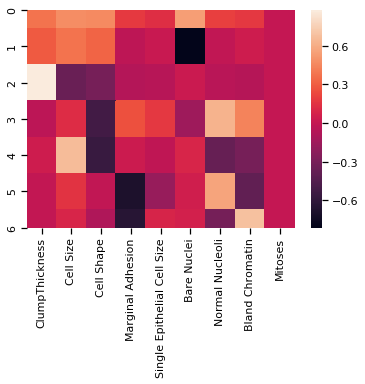

In [139]:
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [140]:
jokes = pd.read_csv("jokes.csv")

In [141]:
jokes.shape

(24983, 101)

In [142]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [144]:
jokes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.0,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.0,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.0,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.0,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.0,99.0
...,...,...,...,...,...,...,...,...
Joke96,24983.0,58.541104,48.130562,-9.95,3.300,99.00,99.0,99.0
Joke97,24983.0,58.017246,48.164681,-9.95,3.590,99.00,99.0,99.0
Joke98,24983.0,57.061650,48.717455,-9.95,2.670,99.00,99.0,99.0
Joke99,24983.0,55.753357,49.237139,-9.95,1.335,99.00,99.0,99.0


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [145]:
jokes2=jokes.drop('NumJokes', axis=1)

In [167]:
ratings=jokes2.iloc[0:200,:]

In [168]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [180]:
#Replacing 99.00 with 0
ratings.replace(99.00,0, inplace=True)

In [182]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [183]:
ratings_mean=ratings.mean()

In [184]:
ratings_mean

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

In [185]:
ratings_mean.sort_values(ascending=False).head(10) 

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64